<a href="https://colab.research.google.com/github/umairnsr87/Hitachi-DataEngineer-HackerEarth/blob/master/More%20EDA_with_PCA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [0]:
test = pd.read_csv('Test_1.csv')
train = pd.read_csv('Train_1.csv')


In [0]:
train["mean_halt_times_source"].fillna(640.265896,inplace=True)
train["latitude_source"].fillna(50.859663,inplace=True)
train["longitude_source"]=train["longitude_source"].fillna(4.360846)
train["country_code_source"].fillna("whber",inplace=True)
train["country_code_destination"].fillna("whber",inplace=True)
train["mean_halt_times_destination"].fillna(164.41907514451,inplace=True)
train.dropna(axis=0,how='any',inplace=True)

In [527]:
train.isna().sum()

id_code                        0
current_date                   0
current_time                   0
source_name                    0
destination_name               0
train_name                     0
target                         0
country_code_source            0
longitude_source               0
latitude_source                0
mean_halt_times_source         0
country_code_destination       0
longitude_destination          0
latitude_destination           0
mean_halt_times_destination    0
current_year                   0
current_week                   0
current_day                    0
is_weekend                     0
dtype: int64

In [528]:
train.shape,test.shape

((1251, 19), (964, 18))

In [0]:
#removing the target
train.reset_index(inplace=True,drop=True)
target=train["target"]
#joining both train and test data for data cleaning
train["data"]="train"
train.drop(["target"],axis=1,inplace=True)
test["data"]="test"
data=pd.concat((train,test),ignore_index=True,axis=0)

In [530]:
#lets start to change the type of the data so that we can convert it into machine learning formal
data['source_name']=data['source_name'].str.replace("station","",case=False)
data['source_name']=data['source_name'].str.replace("$","")

#now change it from test and train
data['destination_name']=data['destination_name'].str.replace("station","",case=False)
data['destination_name']=data['destination_name'].str.replace("$","")

#now changing the datatype of these columns
data['source_name']=pd.to_numeric(data['source_name'])
data['destination_name']=pd.to_numeric(data['destination_name'])

data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2215 entries, 0 to 2214
Data columns (total 19 columns):
id_code                        2215 non-null object
current_date                   2215 non-null object
current_time                   2215 non-null object
source_name                    2215 non-null int64
destination_name               2215 non-null int64
train_name                     2215 non-null object
country_code_source            2215 non-null object
longitude_source               2215 non-null float64
latitude_source                2215 non-null float64
mean_halt_times_source         2215 non-null float64
country_code_destination       2215 non-null object
longitude_destination          2215 non-null float64
latitude_destination           2215 non-null float64
mean_halt_times_destination    2215 non-null float64
current_year                   2215 non-null int64
current_week                   2215 non-null int64
current_day                    2215 non-null object
is_week

In [0]:
from sklearn.preprocessing import LabelEncoder
label=LabelEncoder()


In [0]:
#mapping the data on unique values
data["country_code_source"]=data["country_code_source"].map({'whber':1, 'qwnll':2,'wsluu':3,'logbp':4})
data["country_code_source"]=pd.to_numeric(data["country_code_source"])

In [533]:
data["country_code_destination"].unique()

array(['whber', 'aqfre', 'qwnll', 'zxdec', 'logbp', 'wsluu'], dtype=object)

In [0]:
#changing the data of destination
data["country_code_destination"]=data["country_code_destination"].map({'whber':1, 'qwnll':2,'wsluu':3,
                                                                  'logbp':4,'aqfre':5,'zxdec':6})
data["country_code_destination"]=pd.to_numeric(data["country_code_destination"])


In [0]:
data["current_day"]=data["current_day"].map({'Monday':1,'Tuesday':2,'Wednesday':3, 'Thursday':4, 'Friday':5, 
                         'Saturday':6, 'Sunday':7})
data["current_day"]=pd.to_numeric(data["current_day"])

In [536]:
data.tail(5)

,id_code,current_date,current_time,source_name,destination_name,train_name,country_code_source,longitude_source,latitude_source,mean_halt_times_source,country_code_destination,longitude_destination,latitude_destination,mean_halt_times_destination,current_year,current_week,current_day,is_weekend,data
2210,pnfrvyxsejnehwu,2016-10-29,09:14:45 AM,544,530,ICZVXA,1,3.710675,51.035896,309.014451,1,3.447848,51.092295,78.488439,2016,43,6,True,test
2211,omsilbnrgbvkeak,2016-10-29,10:17:59 AM,530,544,ICZVZA,1,3.447848,51.092295,78.488439,1,3.710675,51.035896,309.014451,2016,43,6,True,test
2212,vkjvqmaaguaeqde,2016-10-29,10:39:10 AM,178,147,ICRYYW,1,4.421101,51.217200,467.982659,1,4.356801,50.845658,634.164740,2016,43,6,True,test
2213,iutnjhogthfpymb,2016-10-29,10:59:55 AM,147,150,ICZVXY,1,4.356801,50.845658,634.164740,1,4.336531,50.835707,686.615607,2016,43,6,True,test
2214,xwqxedeqlnimclu,2016-10-29,11:48:37 AM,525,536,ICZVXW,1,3.216726,51.197226,164.419075,1,3.133864,51.312432,21.416185,2016,43,6,True,test


In [0]:
#feature engineering for date and time
#we are not doing more beacause there are several detailed columns are already present in the dataset
#data["date_and_time_combined"]=+" "+data["current_time"]
#data["current_date"]=pd.to_datetime(data["current_date"])


#getting the current month
xx=data["current_date"].str.split("-",expand=True)

data["current_month"]=xx[1]


In [538]:
data.isna().sum()

id_code                        0
current_date                   0
current_time                   0
source_name                    0
destination_name               0
train_name                     0
country_code_source            0
longitude_source               0
latitude_source                0
mean_halt_times_source         0
country_code_destination       0
longitude_destination          0
latitude_destination           0
mean_halt_times_destination    0
current_year                   0
current_week                   0
current_day                    0
is_weekend                     0
data                           0
current_month                  0
dtype: int64

In [0]:
#getting the hours of the time and converting it nto 24 hours format
a=data["current_time"].str.split(':',expand=True)
b=a[2].str.split(" ",expand=True)
a=a[0]
a=pd.to_numeric(a)
xx=np.where(b[1]=='AM',a+12,a)
xx=np.where(xx==24,0,xx)

hours=pd.DataFrame(xx)
data["hours_of_the_time"]=hours
del hours,xx
data.drop(["current_date","current_time",'id_code'],axis=1,inplace=True)

In [0]:
#changing the weekend into binary column
#data["is_weekend"].unique()
data["is_weekend"]=np.where(data["is_weekend"]==False,0,1)
data["is_weekend"]=pd.to_numeric(data["is_weekend"])

In [0]:
#making dummies for the train names for the trains which have values more that 5
#cat_cols=["train_name"]
#for col in cat_cols:
 #   freqs=data[col].value_counts()
  #  k=freqs.index[freqs>5][:-1]
   # for cat in k:
    #    name=col+'_'+cat
     #   data[name]=(data[col]==cat).astype(int)
    #del data[col]
    #print(col)



#we are deleting the train name for now 
# we will include the code when we will deal with the modelling process
del data["train_name"]

In [0]:
#converting the target into one hot encoding as it is a multiclass problem
#from sklearn.preprocessing import OneHotEncoder
#encoder = OneHotEncoder(handle_unknown='ignore')
#encoder.fit_transform(target)
#from sklearn.preprocessing import MultiLabelBinarizer
#MultiLabelBinarizer().fit_transform(target)


In [542]:
#getting the training and testing data into the original form
train=data[data['data']=='train']
test=data[data['data']=='test']
print(train.shape,test.shape)
train.drop(['data'],axis=1,inplace=True)
test.drop(['data'],axis=1,inplace=True)
print(train.shape,test.shape)
del data

(1251, 17) (964, 17)
(1251, 16) (964, 16)


/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4117: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [0]:

train["target"]=target
train["target"]=train["target"].map({'low':0,'high':2,'medium':1})



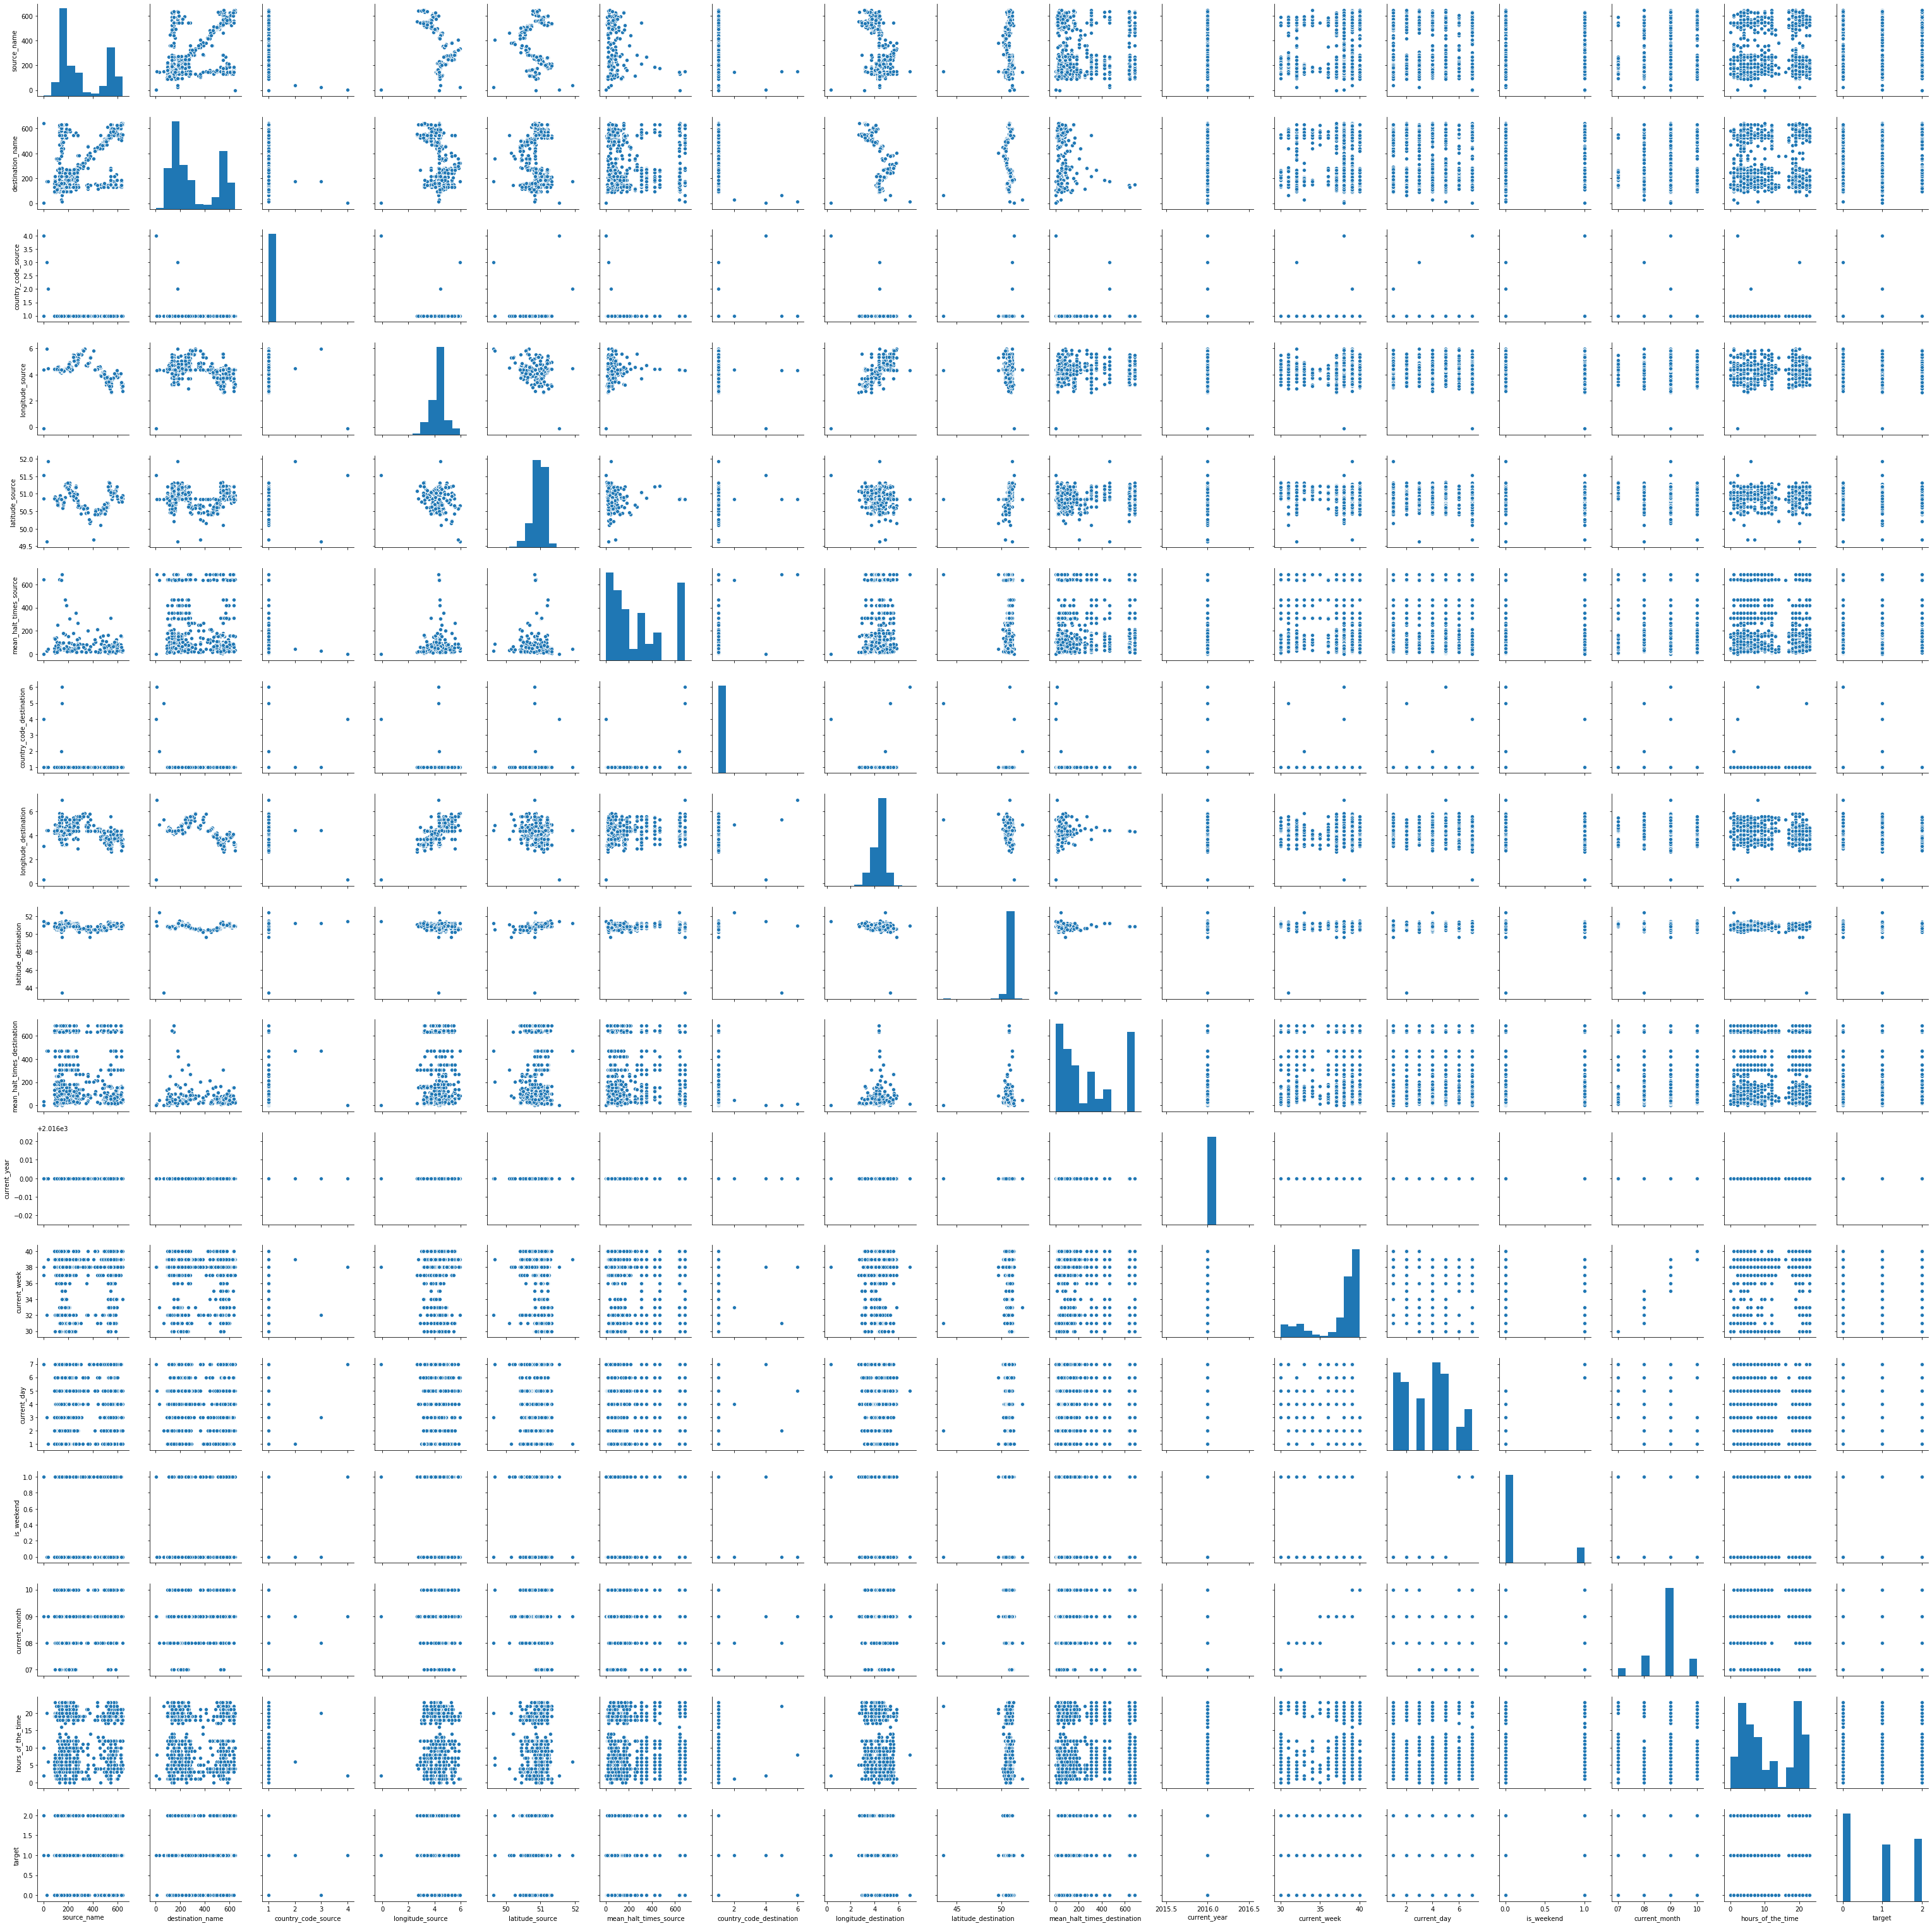

In [544]:
sns.pairplot(train)

Text(0.5, 1.0, 'Hours in a day vs Weekoffs load ')

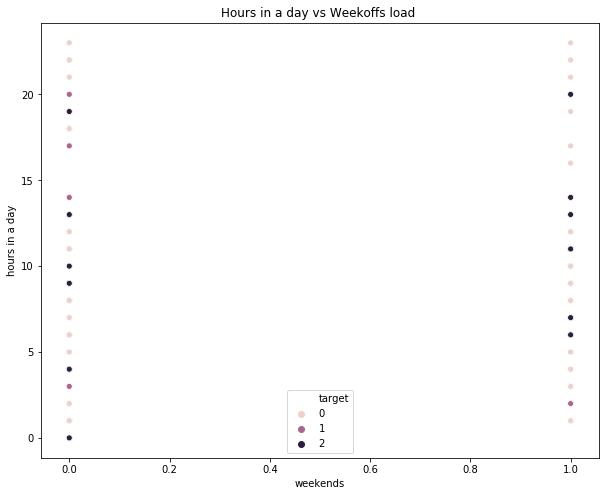

In [545]:
# hours_of_the time vs target 
plt.figure(figsize=(10,8))
sns.scatterplot(y=train["hours_of_the_time"],x=train["is_weekend"],hue=train["target"])
plt.xlabel("weekends")
plt.ylabel("hours in a day")
plt.title("Hours in a day vs Weekoffs load ")
#as we can clearly see that on the working days the volumns is high at the time where people go to office andgo to home
#and on weekoffs the traffic is high in the morning and at afternoon
#there might be several reasons on the weekoff(Maybe the people are going to their native town or shopping)

Text(0.5, 1.0, 'destination station name vs the volume')

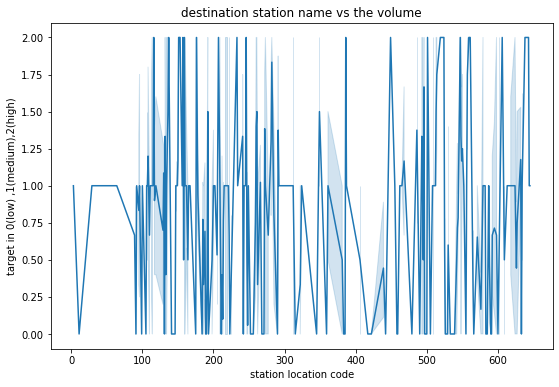

In [546]:
#target vs destination name

plt.figure(figsize=(9,6))
sns.lineplot(y=train["target"], x=train['destination_name'])
plt.xlabel("station location code")
plt.ylabel("target in 0(low) ,1(medium),2(high)")
plt.title("destination station name vs the volume")
#by this graph we can clearly see that as the stations are increasing the population volume is getting low
#this means that there are less number of people who atre commuting from very far places as compares to nearby places


Text(0.5, 1.0, 'Times the train halted on the day from 00:00-23:59:59')

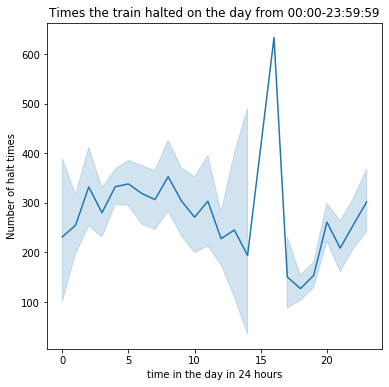

In [549]:
#hours_of_the_time vs  mean_halt_source
plt.figure(figsize=(6,6))
sns.lineplot(x=train["hours_of_the_time"],y=train["mean_halt_times_source"])

plt.xlabel("time in the day in 24 hours")
plt.ylabel("Number of halt times")
plt.title("Times the train halted on the day from 00:00-23:59:59")
#as we can see tthat the train halted nearly 13:00-17:00 the most
#it means the traffic would be the most at this time


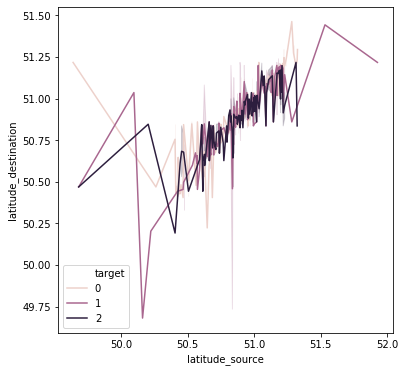

In [550]:
#latitude source to latitude destination vs volume of the traffic
plt.figure(figsize=(6,6))
sns.lineplot(x=train["latitude_source"],y=train["latitude_destination"],hue=train["target"])
#we can clearly see that the major high volume between(50.25 to 51.25 latitude)
#we can clearly see that the normal volume between(49.75 to 51.50 latitude)
#we can clearly see that the normal volume between(49.75 to 51.50 latitude)




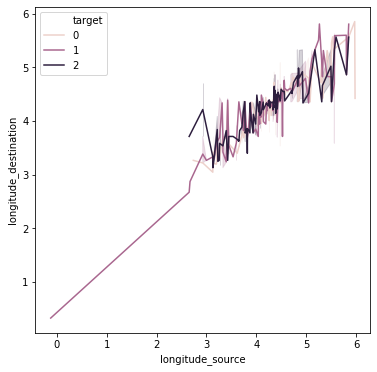

In [551]:
#latitude source to latitude destination vs volume of the traffic
plt.figure(figsize=(6,6))
sns.lineplot(x=train["longitude_source"],y=train["longitude_destination"],hue=train["target"])
#we can clearly see that the major high volume between(3 to 6 longitude)
#we can clearly see that the normal volume between(0 to 6 longitude)
#we can clearly see that the normal volume between(49.75 to 51.50 latitude)

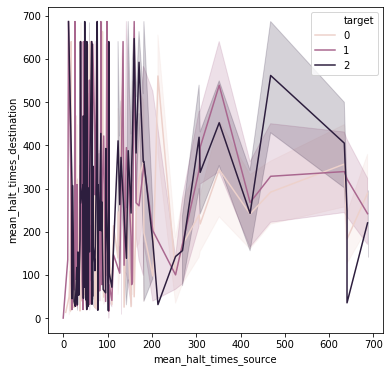

In [552]:
#current_month vs the traffic vs week
plt.figure(figsize=(6,6))
sns.lineplot(train["mean_halt_times_source"],train["mean_halt_times_destination"],hue=train["target"])
#mean_halt times source and destination is alot
#this means there are alot of persons who prefer the train destination alot

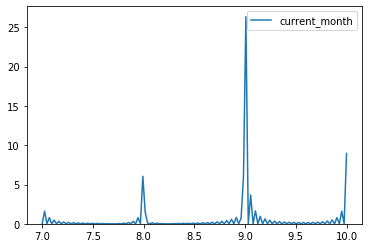

In [553]:
sns.kdeplot(train["current_month"])
# the frequesncy of september is more than in other months


Text(0, 0.5, 'mean halt time source and destination')

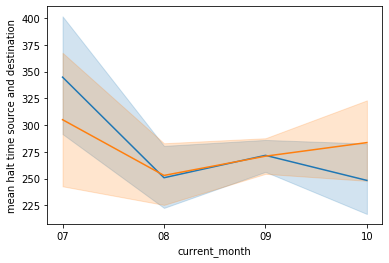

In [554]:
sns.lineplot(train["current_month"],train["mean_halt_times_source"])
sns.lineplot(train["current_month"],train["mean_halt_times_destination"])
plt.ylabel("mean halt time source and destination")

#we can clearly see that mean halt time is less both for source and destination in august(08) and maximum in july(07) 

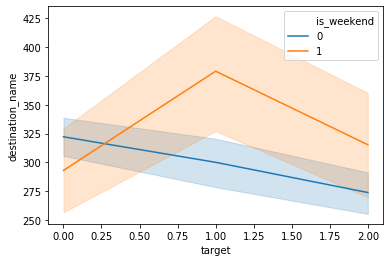

In [555]:
#destination name vs target
sns.lineplot(y=train["destination_name"],x=train["target"],hue=train["is_weekend"])

In [0]:
train.drop(["current_year"],axis=1,inplace=True)
test.drop(["current_year"],axis=1,inplace=True)

In [0]:
#function to get variable importances
def plot_graph(a):
    plt.figure(figsize=(10,10))
    chart=sns.barplot(x=a["name_of_column"],y=a["feature_importance"])
    chart.set_xticklabels(chart.get_xticklabels(), rotation=45)
def feature_importance_plot_rev(dataframe,classifier,limit_of_the_importance):
    x=list(zip(dataframe.columns,classifier.feature_importances_))
    xx=pd.DataFrame(x)
    xx.columns=["name_of_column","feature_importance"]
    xx=xx.sort_values("feature_importance",ascending=False)
    xx=xx[xx["feature_importance"]>limit_of_the_importance]
    plot_graph(xx)
    return xx

In [558]:
#training a model for getting the important features
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

#defining the classifier for feature importance
rfc=RandomForestClassifier()
dtc=DecisionTreeClassifier()

#saperating the train and test data
X_train=train.drop(["target"],axis=1)
Y_train=train["target"]

#fitting our model for variable importance
rfc.fit(X_train,Y_train)
dtc.fit(X_train,Y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

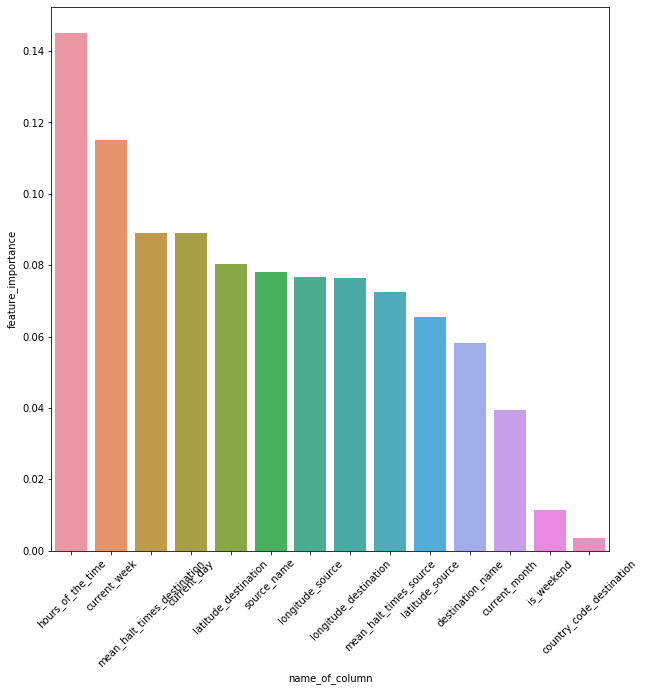

In [559]:
#getting the feature importance from random Forests classifier
variable_importance_df=feature_importance_plot_rev(X_train,dtc,0)


In [0]:
list1=list(variable_importance_df["name_of_column"])

In [0]:
#getting the feature importance from random Forests classifier
#feature_importance_plot_rev(X_train,rfc,0)
#commeting this beacuse the feture importance is same for both of them

In [0]:
#getting the most important function 
df_important_features=pd.DataFrame()

for i in list1:  
  df_important_features=pd.concat((df_important_features,train[i]),axis=1)



In [0]:
df_important_features_test=pd.DataFrame()
for i in list1:  
  df_important_features_test=pd.concat((df_important_features_test,test[i]),axis=1)


In [563]:
df_important_features_test.shape,df_important_features.shape

((964, 14), (1251, 14))

In [0]:
#resource expensive cell
#g = sns.PairGrid(df_important_features)
#g.map_upper(plt.scatter)
#.map_lower(sns.violinplot)
#g.map_diag(sns.kdeplot, lw=3, legend=False);


In [0]:
#now we will visualize whether we should go with th simple model or we should proceed with the complicated model
temp=pd.concat((df_important_features,Y_train),axis=1)
temp.head(5)
from sklearn.decomposition import PCA
pca=PCA(2)
pca_fitted_transformed=pca.fit_transform(df_important_features)


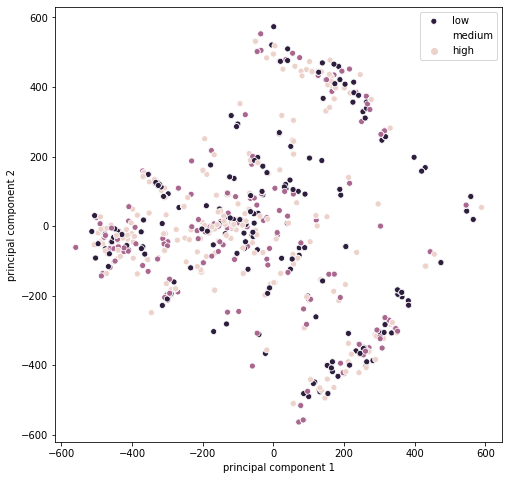

In [565]:
#visualizing pca
principalDf = pd.DataFrame(data = pca_fitted_transformed
             , columns = ['principal component 1', 'principal component 2'])
finalDf = pd.concat([principalDf,Y_train], axis = 1)
plt.figure(figsize=(8,8))
sns.scatterplot(x=finalDf['principal component 1'], y=finalDf['principal component 2'],hue=finalDf['target'])
plt.legend(["low","medium","high"])
plt.show()